### Mackey glass modelling synthetic data

#### ESN with default parameters

test error: 
0.4003359174988022


(9000, 14000)

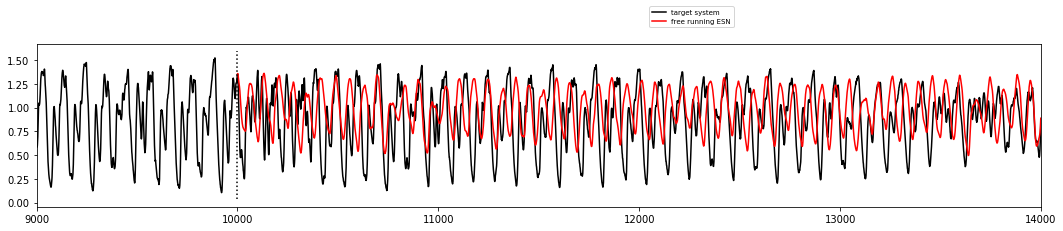

In [3]:
import numpy as np

import sys
sys.path.append('../Code/pyESN-master/')
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('../../Data/Synthetic/Mackey_Glass/Dynamic/mackey_glass_dynamic_with_random_shocks_0.1.npy')
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.3,
          random_state=42)

trainlen = 10000
future = 4000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))


skip_from_train = 9000
plt.figure(figsize=(18,3))
plt.plot(range(skip_from_train,trainlen+future),data[skip_from_train:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlim(skip_from_train, trainlen+future)

In [ ]:
plt.plot(range(trainlen,trainlen+future)[:1000],((prediction.reshape((future,)) - data[-future:])**2)[:1000],'r', label="free running ESN")